# Overview and Background

Precision Agriculture is a management technique that is based on observing, measuring and responding to inter and intra-field variability in crops. <br>
With the avent of techniques such as GPS and GNSS, farmers and researchers could measure many variables such as crop yield, terrain features, organic mantter content, moisture levels, nitrogen levels, K and others important variables. These data could also be collected by sensor arrays and these real-time sensors could measure chlorophyll levels to plant water status and etc. <br>
All these could be used to optimize crop inputs such as water, fertilizer or chemicals. It could suggest farmers to grow the most optimal crop for maximum yeild and profit by these features. It could help farmers too reduce crop failure and take informed decision about farming strategy. <br>


# About the Dataset

The dataset is obtained from kaggle and it has these data fields:
- N - ratio of Nitrogen content in soil
- P - ratio of Phosphorous content in soil
- K - ratio of Potassium content in soil
- temperature - temperature in degree Celsius
- humidity - relative humidity in %
- ph - ph value of the soil
- rainfall - rainfall in mm

The label is the type of recommended crop

# Techniques used

This is a supervised learning task that tries to identify the category that the object belongs to. So, I'll be trying commonly used classification algorithms to build the model.

## Logistic Regression

Logistic regresson is commonly used for binary classification problem and it uses sigmoid functin to return the probability of a label. The probability output from thee sigmoid function is compared wit a pre-defined threshold to generate a label.  <br>
An alternative and modified version of logistic regression is called multinomial logistic regression that could predict a multinomial probability. <br>
common hyperparameters: penalty, max_iter, C, solver <br>

## Random Forest
Random forest is a commonly used ensemble methods that aggreagte results from multiple predictors (a collection of decisin trees). It utilizes bagging method that trains each tree on random sampling of the original dataset and take majority votes from trees. <br>
The advantage of using random forest is that it has better generalization comparing to a single decision tree. <br>
common hyperparameters: n_estimators, max_features, max_depth, min_samples_split, min_samples_leaf, boostrap

## Naive Bayes
Naive Bayes is an algorithm based on Bayes' Theorem. The naive assumption is that each feature is independent to each other and to calculate the conditional probability is based on prior knowledge. <br>
The advantage of naive bayes is that is does not require a huge set of dataset. Gaussian Naive Bayes is a common type that follows the normal distribution.

## XGBoost
XGBoost is an ensemble tecnique but takes a iterative approach. Each tree is not isolation of each other but is trained in sequence and each one is trained to correct the errors made by the previous one. <br>
The advantage of it is that each model added is focused on correcting the mistakes made by the previous ones rather than learning the same mistakes.

# Import library and datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import random
colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

In [2]:
df = pd.read_csv('Crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
#check if theere is null values we need to deal with
df.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

In [5]:
df.shape

(2200, 8)

In [6]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
df.label.value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [8]:
#view the summary statistics of crops
crop_summary = pd.pivot_table(df, index=['label'], aggfunc='mean')
crop_summary.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


In [9]:
features = df.drop(['label'], axis=1)
target = df['label']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2)

# Visualize and analyze data

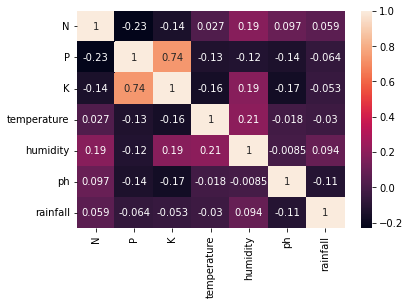

In [11]:
#visualize the correlation of features
sns.heatmap(df.corr(), annot=True)

## Visualize Nitrogen

In [12]:
#Sort the values by nitrogen
crop_summary_N = crop_summary.sort_values(by='N', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_N['N'][0:10].sort_values().index,
    'x' : crop_summary_N['N'][0:10].sort_values()
}

last = {
    'y' : crop_summary_N['N'][-10:].index,
    'x' : crop_summary_N['N'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           marker_color= random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color= random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen (N)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## Visualize Prosphorus


In [13]:
crop_summary_P = crop_summary.sort_values(by='P', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_P['P'][0:10].sort_values().index,
    'x' : crop_summary_P['P'][0:10].sort_values()
}

last = {
    'y' : crop_summary_P['P'][-10:].index,
    'x' : crop_summary_P['P'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Phosphorus (P)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## Visualize Potassium

In [14]:
crop_summary_K = crop_summary.sort_values(by='K', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_K['K'][0:10].sort_values().index,
    'x' : crop_summary_K['K'][0:10].sort_values()
}

last = {
    'y' : crop_summary_K['K'][-10:].index,
    'x' : crop_summary_K['K'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Potassium (K)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# Build models, training and evaluation

In [15]:
#store the model name and accuracy
acc = []
model =[]

## Logistic Regression

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [17]:
from sklearn.linear_model import LogisticRegression

#scale the data and fit with logistic regression
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [18]:
predicted = pipe.predict(X_test)

In [19]:
LR_acc = metrics.accuracy_score(y_test, predicted)
acc.append(LR_acc)
model.append('Logistic Regression')
LR_acc

0.9795454545454545

In [20]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        20
   blackgram       0.88      0.88      0.88        17
    chickpea       1.00      1.00      1.00        15
     coconut       0.96      1.00      0.98        23
      coffee       1.00      1.00      1.00        25
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        13
        jute       0.87      1.00      0.93        20
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.88      1.00      0.94        15
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        14
   mothbeans       1.00      0.91      0.95        23
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      0.95      0.98        21
      papaya       1.00    

## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20)
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [22]:
predicted = RF.predict(X_test)

In [23]:
RF_acc = metrics.accuracy_score(y_test, predicted)
acc.append(RF_acc)
model.append('Random Forest')
RF_acc

1.0

In [24]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        17
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        23
      coffee       1.00      1.00      1.00        25
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        13
        jute       1.00      1.00      1.00        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        15
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        14
   mothbeans       1.00      1.00      1.00        23
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        21
      papaya       1.00    

## Gaussian Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

In [26]:
#Get the predicted labels
predicted = GNB.predict(X_test)

In [27]:
GNB_acc = metrics.accuracy_score(y_test, predicted)
acc.append(GNB_acc)
model.append('Naive Bayes')
GNB_acc

0.9977272727272727

In [28]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        17
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        23
      coffee       1.00      1.00      1.00        25
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        13
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        15
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        14
   mothbeans       1.00      1.00      1.00        23
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        21
      papaya       1.00    

## XGBoost

In [29]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

In [30]:
predicted = XB.predict(X_test)

In [31]:
XGB_acc = metrics.accuracy_score(y_test, predicted)
acc.append(XGB_acc)
model.append('XGBoost')
XGB_acc

0.990909090909091

In [32]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        17
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        23
      coffee       1.00      1.00      1.00        25
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        13
        jute       0.95      0.95      0.95        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.88      1.00      0.94        15
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        14
   mothbeans       1.00      0.91      0.95        23
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        21
      papaya       1.00    

# Compare the models and save the best one

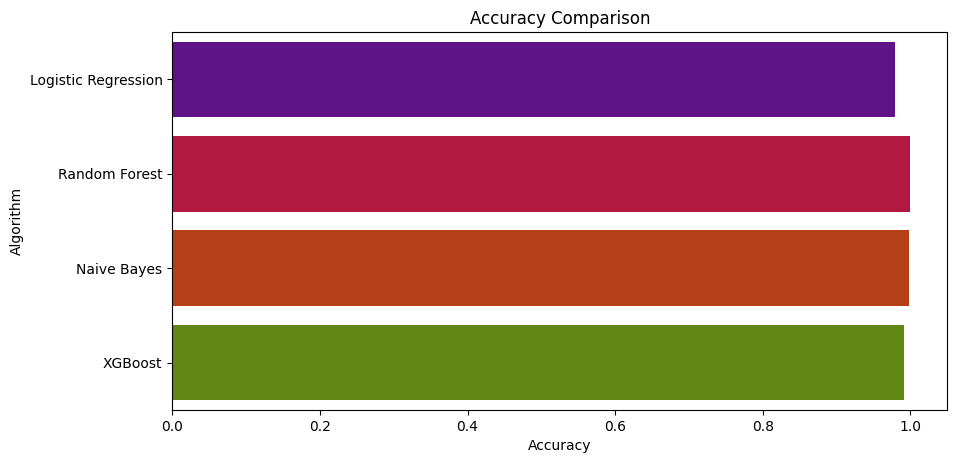

In [33]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='brg')

In [34]:
accuracy_models = dict(zip(model, acc))
for key, value in accuracy_models.items():
    print (key, '-->', value)

Logistic Regression --> 0.9795454545454545
Random Forest --> 1.0
Naive Bayes --> 0.9977272727272727
XGBoost --> 0.990909090909091


In [37]:
#Save the files
import pickle
RF_pkl_filename = 'RandomForest.pkl'
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
RF_Model_pkl.close()

In [38]:
#Make a prediction
data = np.array([[102, 20, 20, 32, 70, 8, 150]])
prediction = RF.predict(data)
print(prediction)

['coffee']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



# References

https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset?datasetId=1046158&sortBy=voteCount <br>
https://en.wikipedia.org/wiki/Precision_agriculture <br>
https://machinelearningmastery.com/multinomial-logistic-regression-with-python/ <br>
https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501 <br>
https://towardsdatascience.com/a-beginners-guide-to-xgboost-87f5d4c30ed7 <br>
https://www.kaggle.com/code/atharvaingle/what-crop-to-grow/notebook#Guassian-Naive-Bayes <br>
https://www.kaggle.com/code/ysthehurricane/crop-recommendation-system-using-lightgbm <br>
